<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL06a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1019]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [1020]:
import pandas as pd

In [1021]:
data=pd.read_csv("/content/B0006.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [1022]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


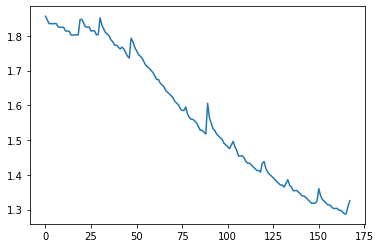

In [1023]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [1024]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [1025]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

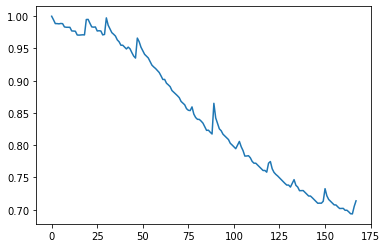

In [1026]:
plt.plot(range(len(soh)),soh)
plt.show()

In [1027]:
capacity=np.asarray(capacity)

In [1028]:
type(capacity)

numpy.ndarray

In [1029]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [1030]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1031]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.4081
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0915
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 5.5198e-04


In [1032]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1033]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [1034]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.0016565747397019538

In [1035]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.041


In [1036]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.0401326]
R2_score:  -1.2010821295673808


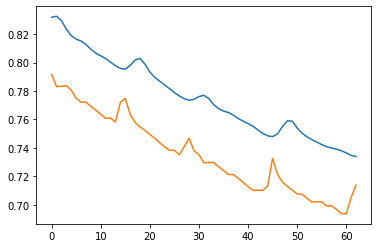

In [1037]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [1038]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1039]:
preds

array([[1.0108907 ],
       [1.0091138 ],
       [1.0088694 ],
       [1.0085561 ],
       [1.007313  ],
       [1.0054475 ],
       [1.003959  ],
       [1.0032153 ],
       [1.0017811 ],
       [0.9998418 ],
       [0.9979057 ],
       [0.9961133 ],
       [0.9940714 ],
       [0.99257845],
       [0.9924155 ],
       [0.994127  ],
       [1.0000097 ],
       [1.0075488 ],
       [1.0117838 ],
       [1.0093843 ],
       [1.005927  ],
       [1.0037885 ],
       [1.0020578 ],
       [1.0001068 ],
       [0.9981612 ],
       [0.9964367 ],
       [0.99624515],
       [1.0004708 ],
       [1.0057758 ],
       [1.0067188 ],
       [1.0013733 ],
       [0.9967356 ],
       [0.9931271 ],
       [0.9896739 ],
       [0.9858117 ],
       [0.9819126 ],
       [0.97896546],
       [0.97661424],
       [0.974933  ],
       [0.9737559 ],
       [0.97278416],
       [0.97069365],
       [0.9666597 ],
       [0.9646245 ],
       [0.9692306 ],
       [0.9765823 ],
       [0.9799613 ],
       [0.975

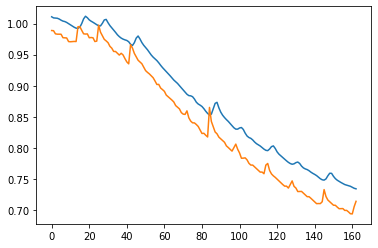

In [1040]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [1041]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [1042]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.7413
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 1.3077
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2332
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1395
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1222
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0166
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0565
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0293


In [1043]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [1044]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 3ms/step


0.0004128686328545341

In [1045]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.020


In [1046]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.01579862]
R2_score:  0.840832981757031


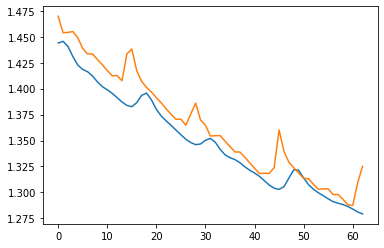

In [1047]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [1048]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [1049]:
preds

array([[1.7451489],
       [1.7420206],
       [1.7414131],
       [1.7410512],
       [1.7390723],
       [1.735837 ],
       [1.7333461],
       [1.7320989],
       [1.7298088],
       [1.7264098],
       [1.7233526],
       [1.720306 ],
       [1.7167128],
       [1.7142144],
       [1.7137672],
       [1.7159907],
       [1.7252957],
       [1.7388049],
       [1.7460483],
       [1.742729 ],
       [1.7368169],
       [1.7332304],
       [1.7302896],
       [1.7268373],
       [1.7238044],
       [1.7208182],
       [1.7196332],
       [1.7264737],
       [1.7363405],
       [1.7377634],
       [1.7296857],
       [1.7215643],
       [1.7155187],
       [1.7097027],
       [1.7032156],
       [1.696656 ],
       [1.6914774],
       [1.6876141],
       [1.6845409],
       [1.682508 ],
       [1.6811123],
       [1.6777062],
       [1.67109  ],
       [1.6667066],
       [1.6736156],
       [1.6870605],
       [1.6926314],
       [1.6857045],
       [1.6759521],
       [1.668256 ],


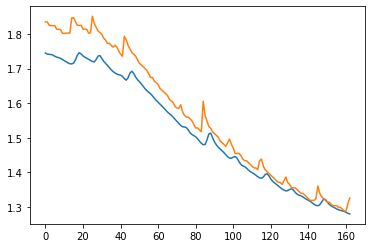

In [1050]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()